### Simple Linear Regression - Derivation and Implementation

This notebook explains **Simple Linear Regression** through detailed derivation and a Python implementation from scratch.

---

## Mathematical Derivation

We aim to fit a line of the form:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

Minimize the **sum of squared errors (SSE)**:

$$
J(\beta_0, \beta_1) = \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)^2
$$

### Step 1: Partial Derivative with respect to  Slope(bela_0)

$$
\frac{\partial J}{\partial \beta_0} = -2 \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)
$$

Set derivative to zero:

$$
\sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i) = 0
$$

Distribute summation:

$$
\sum y_i - n\beta_0 - \beta_1 \sum x_i = 0
$$

Solve for \( \beta_0 \):

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

---

### Step 2: Partial Derivative with respect to Intercept (beta_1)

$$
\frac{\partial J}{\partial \beta_1} = -2 \sum x_i (y_i - \beta_0 - \beta_1 x_i)
$$

Set derivative to zero and simplify:

$$
\beta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

---

### Final Formulae

- **Slope**:

$$
\beta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

- **Intercept**:

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

---

## Python Implementation from Scratch

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.slope = None
        self.intercept = None

    def fit(self, X, y):
        n = len(X)
        x_mean = np.mean(X)
        y_mean = np.mean(y)
        numerator = 0
        denominator = 0
        for i in range(n):
            numerator += (X[i] - x_mean) * (y[i] - y_mean)
            denominator += (X[i] - x_mean) ** 2
        self.slope = numerator / denominator
        self.intercept = y_mean - self.slope * x_mean

    def predict(self, X):
        y_pred = []
        for x in X:
            y_pred.append(self.slope * x + self.intercept)
        return y_pred

In [9]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

print("Slope:", model.slope)
print("Intercept:", model.intercept)
print("Predictions:", predictions)

Slope: 0.6
Intercept: 2.2
Predictions: [2.8000000000000003, 3.4000000000000004, 4.0, 4.6, 5.2]


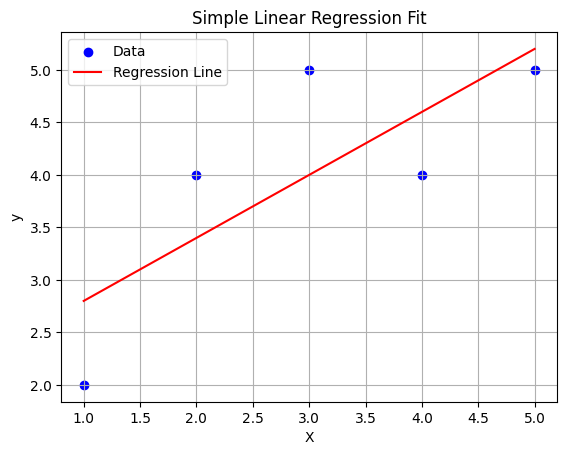

In [11]:
# Plotting the data and regression line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Simple Linear Regression Fit')
plt.grid(True)
plt.show()

# Vectorized

## Derivation


We want to find \( \boldsymbol{\theta} \) such that:

$$
\hat{\mathbf{y}} = \mathbf{X} \boldsymbol{\theta}
$$

Where:

- \( \mathbf{X} \in \mathbb{R}^{m \times n} \): Input matrix (with bias column included)
- \( \boldsymbol{\theta} \in \mathbb{R}^{n \times 1} \): Parameters
- \( \mathbf{y} \in \mathbb{R}^{m \times 1} \): Target/output values

---

### Objective:

Minimize the sum of squared errors:


$$
J(\boldsymbol{\theta}) = \| \mathbf{X} \boldsymbol{\theta} - \mathbf{y} \|^2
$$

Which can be written as:

$$
J(\boldsymbol{\theta}) = (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$$

---

### Take the Gradient:

Differentiate with respect to \( \boldsymbol{\theta} \):

$$
\nabla_{\boldsymbol{\theta}} J = 2 \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$$

---

### Set the Gradient to Zero:

To minimize the cost:

$$
\mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y}) = 0
$$

Expanding:

$$
\mathbf{X}^T \mathbf{X} \boldsymbol{\theta} = \mathbf{X}^T \mathbf{y}
$$

---

### Solve for \( \boldsymbol{\theta} \):

Multiply both sides by the inverse of \( \mathbf{X}^T \mathbf{X} \):

$$
\boldsymbol{\theta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

---

### Final Formula:

This is the **Normal Equation**:

$$
\boxed{
\boldsymbol{\theta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
}
$$

In [15]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.W = None

    def fit(self, X, y):
        '''
        X: shape (n_samples, n_features)
        y: shape (n_samples,)
        '''
        n = X.shape[0]

        # Add bias term (intercept): prepend column of ones
        X_bias = np.hstack([np.ones((n, 1)), X])

        # Compute weights using closed-form formula
        self.W = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

    def predict(self, X):
        n = X.shape[0]

        # Add bias term to input before predicting
        X_bias = np.hstack([np.ones((n, 1)), X])
        return X_bias @ self.W

In [16]:
# Generate simple linear data: y = 2x + 3
X = np.array([[1], [2], [3], [4]])
y = np.array([5, 7, 9, 11])

model = LinearRegression()
model.fit(X, y)

print("Weights:", model.W)  # Should be close to [3, 2]

predictions = model.predict(X)
print("Predictions:", predictions)

Weights: [3. 2.]
Predictions: [ 5.  7.  9. 11.]


# Notes

1. This only works if 
$$
\boldsymbol(\mathbf{X}^T \mathbf{X})
$$

is invertible (full rank). Otherwise, use **Moore-Penrose pseudo-inverse**:

2. The advantage of this closed-form solution is it's exact and fast for small datasets.
The disadvantage is it becomes slow and unstable for very large feature matrices due to matrix inversion (O^n3)

# Improvement: with Gradient Descent

## Univariate Linear Regression with Gradient Descent (from scratch)

### Model:

We want to find \( w \) and \( b \) such that:

$$
\hat{y} = w x + b
$$

where
- \( x \) is the input feature,
- \( \hat{y} \) is the predicted output,
- \( w \) is the slope,
- \( b \) is the intercept.

---

### Cost Function:

We minimize the Mean Squared Error (MSE):

$$
J(w, b) = \frac{1}{n} \sum_{i=1}^n (w x_i + b - y_i)^2
$$

where \( n \) is the number of samples, and \( y_i \) is the true value.

---

### Gradients:

The partial derivatives of \( J \) with respect to \( w \) and \( b \) are:

$$
\frac{\partial J}{\partial w} = \frac{2}{n} \sum_{i=1}^n x_i (w x_i + b - y_i)
$$

$$
\frac{\partial J}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i)
$$

---

### Gradient Descent Update Rule:

At each iteration, update parameters as:

$$
w := w - \alpha \frac{\partial J}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

where \( \alpha \) is the learning rate.

---

### Summary:

Repeat updates until convergence or for a fixed number of iterations:

$$
\begin{cases}
w \leftarrow w - \alpha \frac{2}{n} \sum_{i=1}^n x_i (w x_i + b - y_i) \\
b \leftarrow b - \alpha \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i)
\end{cases}
$$

In [50]:
import numpy as np

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.slope = 0
        self.intercept = 0
        # optional- cost tracking
        self.losses = []

    def fit(self, X, y):
        n = len(X)
        X = np.array(X)
        y = np.array(y)

        for _ in range(self.n_iters):
            y_pred = X * self.slope + self.intercept
            error = y_pred - y

            # Compute gradients
            dw = (2 / n) * np.sum(X *error)
            db = (2 / n) * np.sum(error)

            # Update parameters
            self.slope -= self.learning_rate * dw
            self.intercept -= self.learning_rate * db

            # optional - cost tracking
            cost = np.mean((y_pred - y) ** 2)
            self.losses.append(cost)

    def predict(self, X):
        return [self.slope * x + self.intercept for x in X]

In [51]:
X = [1, 2, 3, 4, 5]
y = [3, 5, 7, 9, 11]  # Linear: y = 2x + 1

model = LinearRegressionGD(learning_rate=0.01, n_iters=1000)
model.fit(X, y)

print("Slope:", model.slope)
print("Intercept:", model.intercept)
print("Predictions:", model.predict([6, 7]))

Slope: 2.003880582342283
Intercept: 0.9859898664422495
Predictions: [13.009273360495946, 15.01315394283823]


In [52]:
# the above code fails when input is multi-dimensional matrix

In [53]:
X = np.array([[1, 2], [2, 3], [4, 5], [3, 6], [5, 8]])
y = np.array([3, 5, 9, 8, 12])

model = LinearRegressionGD(learning_rate=0.01, n_iters=10)
model.fit(X, y)

print("Slope:", model.slope)
print("Intercept:", model.intercept)
print("Predictions:", model.predict([6, 7]))

ValueError: operands could not be broadcast together with shapes (5,2) (5,) 

In [54]:
# Fix: use proper matrix 
import numpy as np

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        n_samples, n_features = X.shape
        self.slope = np.zeros(n_features)
        self.intercept = 0
        # optional- cost tracking
        self.losses = []

    def fit(self, X, y):
        n = len(X)
        X = np.array(X)
        y = np.array(y)

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.slope) + self.intercept
            error = y_pred - y

            # Compute gradients
            dw = (2 / n) * np.sum(X.T @ error)
            db = (2 / n) * np.sum(error)

            # Update parameters
            self.slope -= self.learning_rate * dw
            self.intercept -= self.learning_rate * db

            # optional - cost tracking
            cost = np.mean((y_pred - y) ** 2)
            self.losses.append(cost)

    def predict(self, X):
        return [self.slope * x + self.intercept for x in X]

In [55]:
X = np.array([[1, 2], [2, 3], [4, 5], [3, 6], [5, 8]])
y = np.array([3, 5, 9, 8, 12])

model = LinearRegressionGD(learning_rate=0.01, n_iters=10)
model.fit(X, y)

print("Slope:", model.slope)
print("Intercept:", model.intercept)
print("Predictions:", model.predict([6, 7]))

Slope: [0.92749091 0.92749091]
Intercept: 0.109881080881638
Predictions: [array([5.67482652, 5.67482652]), array([6.60231743, 6.60231743])]


## 🧾 Optional: Add Cost Tracking

Text(0.5, 1.0, 'Loss Curve')

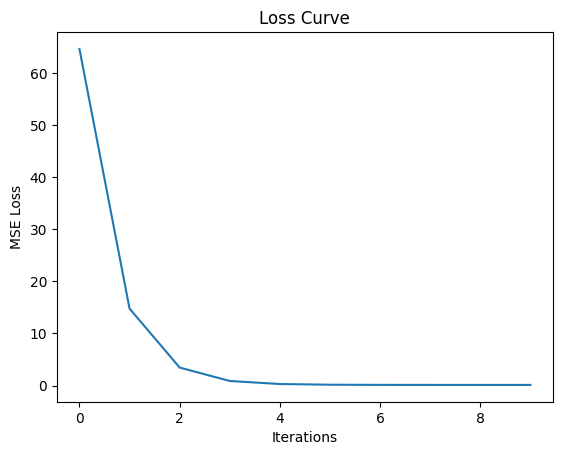

In [56]:
import matplotlib.pyplot as plt
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss Curve")

# Code using sklearn module

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Sample data
X = np.array([[1, 2], [2, 3], [4, 5], [3, 6], [5, 8]])
y = np.array([3, 5, 9, 8, 12])

# 1. OLS Regression (Ordinary Least Squares)
ols = LinearRegression()
ols.fit(X, y)
print("OLS coefficients:", ols.coef_)
print("OLS intercept:", ols.intercept_)

# 2. Ridge Regression (L2 regularization)
ridge = Ridge(alpha=1.0)  # alpha is lambda
ridge.fit(X, y)
print("Ridge coefficients:", ridge.coef_)
print("Ridge intercept:", ridge.intercept_)

# 3. Lasso Regression (L1 regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
print("Lasso coefficients:", lasso.coef_)
print("Lasso intercept:", lasso.intercept_)

OLS coefficients: [1.5 0.5]
OLS intercept: 0.4999999999999982
Ridge coefficients: [1.06382979 0.73556231]
Ridge intercept: 0.6778115501519766
Lasso coefficients: [1.36324994 0.56203951]
Lasso intercept: 0.6124605294405683
